In [18]:
import numpy as np
import pandas as pd
import thinfilm as tm
import material as ml
import matplotlib.pyplot as plt

air = ml.Non_Dispersion(1)
sodalime = ml.open_material('sodalime', 'Material')
SiO2 = ml.open_material('SiO2_LENS', 'Sellmeier')
SiN = ml.open_material('SiN_LENS', 'Sellmeier')
ITO = ml.open_material('ITO_LENS', 'Sellmeier')
OC = ml.open_material('OC_HRI_LENS', 'Material')

wl = np.linspace(400, 700, 301)

hypo_bri = lambda th: tm.Design(
    [air,SiN, SiO2,  OC, ITO, OC, ITO, SiO2, SiN, sodalime],
    [None, th[0], th[1], th[2], th[3], 1200, 55, th[4], th[5], None]
).reflectance(wl)

hypo_dia = lambda th: tm.Design(
    [air,SiN, SiO2,  OC, ITO, SiO2, SiN, sodalime],
    [None, th[0], th[1], th[2], th[3], th[4], th[5], None]
).reflectance(wl)

hypo_tra = lambda th: tm.Design(
    [air, SiN, SiO2,  OC,SiO2, SiN, sodalime],
    [None, th[0], th[1], th[2], th[4], th[5], None]
).reflectance(wl)

In [19]:
f1 = [28.2594266,20.,1840.17816855,27.16582897,35.30283345,8.69928171]

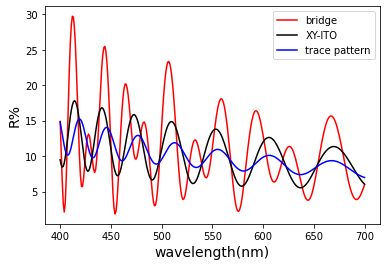

bridge: 11.152915440838763
xy-ITO: 10.309686343059067
pattern: 9.953442819451713
delta_d_t: 1.846401103619517
delta_d_b: 3.776193295598398


In [21]:
tk = f1

plt.plot(wl, 100*hypo_bri(tk), '-r', label = 'bridge')
plt.plot(wl, 100*hypo_dia(tk), '-k', label = 'XY-ITO')
plt.plot(wl, 100*hypo_tra(tk), '-b', label = 'trace pattern')
plt.xlabel('wavelength(nm)', fontsize = 14)
plt.ylabel('R%', fontsize = 14)
plt.legend(loc = 'best')
plt.savefig('LENS_rev2_simulation')
plt.show()

print('bridge:',100*np.mean(hypo_bri(tk)))
print('xy-ITO:',100*np.mean(hypo_dia(tk)))
print('pattern:',100*np.mean(hypo_tra(tk)))
print('delta_d_t:',np.mean(abs(100*hypo_tra(tk)-100*hypo_dia(tk))))
print('delta_d_b:',np.mean(abs(100*hypo_bri(tk)-100*hypo_dia(tk))))